### Import Required Libraries
This cell imports essential Python libraries for data manipulation, preprocessing, model training, hyperparameter tuning, and performance evaluation. It includes tools for handling datasets, scaling features, training machine learning classifiers, and assessing model accuracy using evaluation metrics.


In [ ]:
# liver_disease_prediction.py

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading a dataset

In [ ]:
# 1. Load dataset
# You should download ILPD dataset and save as 'ILPD.csv' or similar
df = pd.read_csv("/content/drive/MyDrive/Dataset/ILPD.csv")

# Quick data check
print("Shape:", df.shape)
df.tail(10)

Shape: (583, 11)


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


### Data Preprocessing
- Handle missing and null values in the dataset  
- Encode categorical features into numerical values  
- Separate input features (X) and target variable (y)  
- Split the dataset into training and testing sets  
- Apply feature scaling where required for cer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,0


In [ ]:
# Example: if target column name is "Dataset"
df = df.rename(columns={df.columns[-1]: "Target"})  # rename last column to Target, if needed
df['Target'] = df['Target'].map({1: 1, 2: 0})  # 1 -> disease, 0 -> no disease

In [ ]:
df.head(20)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Male      441
Female    142
Name: count, dtype: int64


/tmp/ipython-input-1984675652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='viridis')


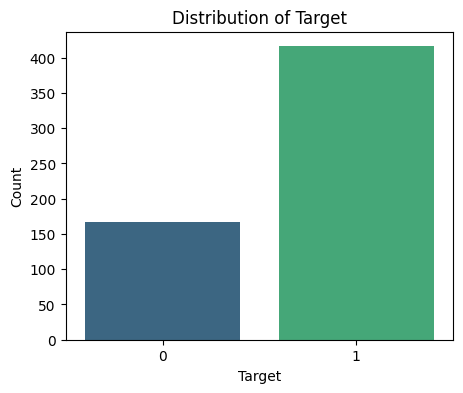

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})
print(df)


     age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0     65       0            0.7               0.1           187       16   
1     62       1           10.9               5.5           699       64   
2     62       1            7.3               4.1           490       60   
3     58       1            1.0               0.4           182       14   
4     72       1            3.9               2.0           195       27   
..   ...     ...            ...               ...           ...      ...   
578   60       1            0.5               0.1           500       20   
579   40       1            0.6               0.1            98       35   
580   52       1            0.8               0.2           245       48   
581   31       1            1.3               0.5           184       29   
582   38       1            1.0               0.3           216       21   

     ag_ratio  sgpt  sgot  alkphos  Target  
0          18   6.8   3.3     0.90       1

In [ ]:

# Separate features and target
X = df.drop("Target", axis=1)
y = df["Target"]

In [ ]:
y.head(10)

,Target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [ ]:
X.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00


### Feature Scaling
This step standardizes the input features using `StandardScaler` to ensure all variables are on the same scale. Feature scaling is especially important for distance-based models such as Support Vector Machine (SVM) to improve learning efficiency and model performance.


In [ ]:
 #Optional: scale features (important for SVM)
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)


In [ ]:
# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### Model Definition
- Define a Decision Tree classifier with a fixed random state for reproducibility  
- Define a Random Forest classifier to improve accuracy using multiple decision trees  
- Define a Support Vector Machine (SVM) classifier for margin-based classification  
- Store all models in a dictionary for easy training and comparison  


In [ ]:

# 4. Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


### Model Training and Evaluation
- Train each machine learning model using the training dataset  
- Generate predictions on the test dataset  
- Evaluate model performance using accuracy score  
- Display precision, recall, and F1-score using a classification report  
- Visualize prediction results using a confusion matrix  
- Compare the performance of all models to identify the best one  


In [ ]:
 #5. Train and evaluate with default parameters
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("=== {} ===".format(name))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")




=== Decision Tree ===
Accuracy: 0.5982905982905983
              precision    recall  f1-score   support

           0       0.29      0.26      0.28        34
           1       0.71      0.73      0.72        83

    accuracy                           0.60       117
   macro avg       0.50      0.50      0.50       117
weighted avg       0.59      0.60      0.59       117

Confusion Matrix:
 [[ 9 25]
 [22 61]]


=== Random Forest ===
Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           0       0.53      0.29      0.38        34
           1       0.76      0.89      0.82        83

    accuracy                           0.72       117
   macro avg       0.64      0.59      0.60       117
weighted avg       0.69      0.72      0.69       117

Confusion Matrix:
 [[10 24]
 [ 9 74]]


=== SVM ===
Accuracy: 0.7094017094017094
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


```markdown
### Hyperparameter Tuning and Model Optimization
- Define hyperparameter grids for Random Forest and Support Vector Machine (SVM)  
- Use GridSearchCV to perform exhaustive search with cross-validation  
- Optimize model parameters based on accuracy score  
- Identify the best parameter combination for each model  
- Retrain models using the best-found parameters  
- Evaluate tuned models on the test dataset using accuracy and classification report  
- Compare tuned model performance with default models to ensure improvement  
```


In [ ]:
# 6. Hyperparameter tuning (example for Random Forest and SVM — you can do same for Decision Tree)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("RF (tuned) Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)
print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print("SVM (tuned) Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RF (tuned) Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           0       0.53      0.29      0.38        34
           1       0.76      0.89      0.82        83

    accuracy                           0.72       117
   macro avg       0.64      0.59      0.60       117
weighted avg       0.69      0.72      0.69       117

Best SVM params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM (tuned) Accuracy: 0.7094017094017094
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.71      1.00      0.83        83

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Final Observations
- **Random Forest (Tuned)** achieved the best overall performance:
  - Best parameters: `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}`
  - Accuracy: **0.72**
  - Class 0 (non-disease) has lower recall (0.29) due to class imbalance
  - Class 1 (disease) is well-predicted with high precision (0.76) and recall (0.89)
- **SVM (Tuned)** achieved slightly lower accuracy:
  - Best parameters: `{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}`
  - Accuracy: **0.71**
  - Failed to predict class 0 (precision and recall = 0), highlighting sensitivity to class imbalance
- **Conclusion**:
  - Random Forest is the most suitable model for liver disease prediction in this dataset
  - Class imbalance affects minority class performance; consider resampling techniques for improvement
- **Note**: Warnings indicate precision is ill-defined for labels with no predicted samples, typical in imbalanced datasets.
